<h2>Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects

<h2>Text Properties

In [11]:
# TEXT DICTIONARIES - customise if you want
font_title = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'70', 'weight':'bold'}
font_anno_dark = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'25'}
font_anno_dark_small = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'15'}
font_anno_light = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '35'}
font_anno_light_small = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '25'}
font_background = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '135'}
font_sankey = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '25', 
               'path_effects': [PathEffects.withStroke(linewidth=3, foreground='b')]}
rect_prop = {'color': '#79F10E', 'alpha': 0.2, 'zorder': 1}

<h2>Data

In [13]:
# DATA - use own data if wanted and replace path
# replace with own .csv file ('X', 'Y', 'Gender', 'rand shuffle')
chart_one = pd.read_csv('uni-totalNEU.csv')

font_path = 'weepeople.ttf' #included in Github folder
weepeople_font = font_manager.FontProperties(fname=font_path, size=58)

<h2>Plot

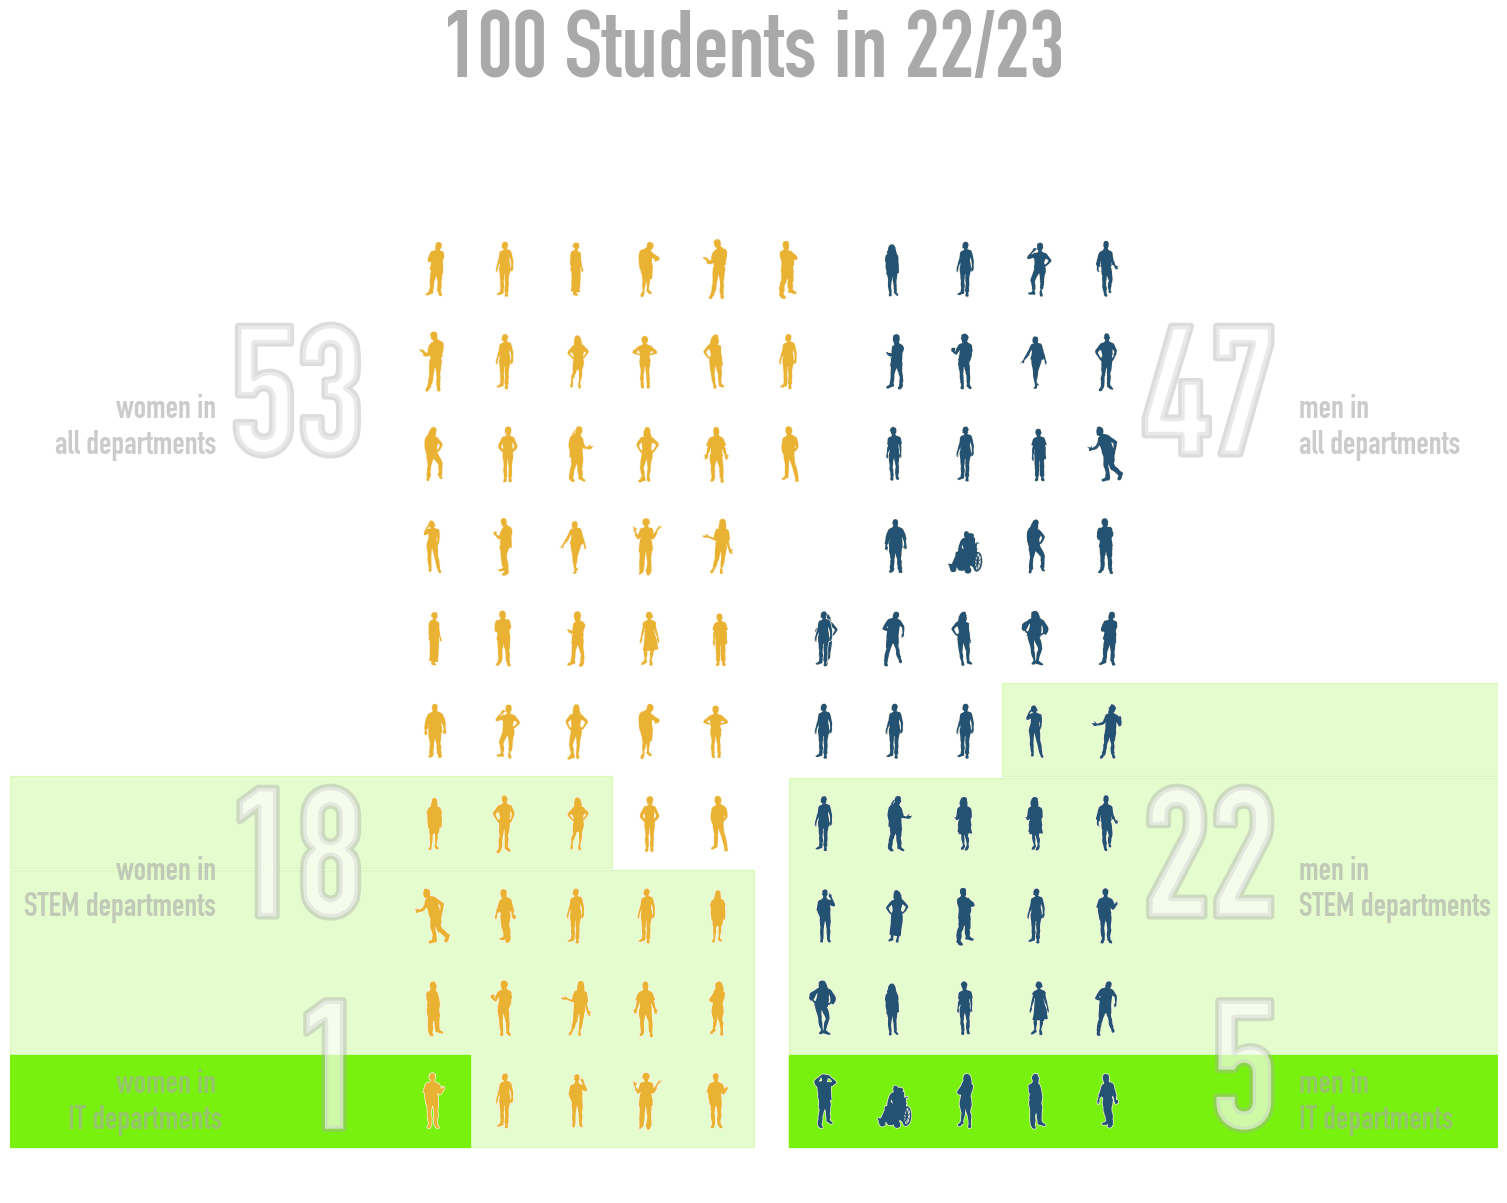

In [10]:
# PLOT SIZE
f, ax = plt.subplots(figsize=(20, 15), dpi=96)
# LIMITS
ax.set_xlim(-5, 16)
ax.set_ylim(0, 12)

# Set Up elements in lists

# HIGHLIGHT RECTANGLES - this has to be adapted manually to the preferred ratios
rectangles = [ # xy-coordinates, width, height, **dict (colour, alpha, zorder)
    {'xy': (-5, 0.5), 'width': 10.5, 'height': 3., **rect_prop},
    {'xy': (-5, 3.52), 'width': 8.5, 'height': 1.,  **rect_prop},
    {'xy': (-5, 0.5), 'width': 6.5, 'height': 1,  **rect_prop, 'alpha' : 1}, # override alpha value to highlight further
    {'xy': (6., 0.5), 'width': 12, 'height': 4,  **rect_prop},
    {'xy': (9., 4.52), 'width': 10, 'height': 1,  **rect_prop},
    {'xy': (6, 0.5), 'width': 12, 'height': 1,  **rect_prop, 'alpha' : 1} # override alpha value to highlight further                    
]

# NUMBERS BACKGROUND - this has to be adapted manually to the preferred text
numbers = [ # x-coordinate, y-coordinate, text, alignment
    {'x': 0, 'y': 8, 'text': '53', 'ha': 'right'},
    {'x': 0, 'y': 3, 'text': '18', 'ha': 'right'},
    {'x': 0, 'y': 0.7, 'text': '1', 'ha': 'right'},
    {'x': 11., 'y': 8, 'text': '47', 'ha': 'left'},
    {'x': 11., 'y': 3, 'text': '22', 'ha': 'left'},
    {'x': 11., 'y': 0.7, 'text': '  5', 'ha': 'left'}
]

# TEXT FOR NUMBERS - this has to be adapted manually to the preferred text
text_numbers = [ # x-coordinate, y-coordinate, text, alignment
    {'x': -2, 'y':8, 'text':'women in \nall departments ', 'ha':'right'},
    {'x': -2, 'y':3, 'text':'women in \nSTEM departments ', 'ha':'right'},
    {'x': -2, 'y':0.7, 'text':'women in \nIT departments', 'ha':'right'},
    {'x': 13.2, 'y':8, 'text':'men in \nall departments ', 'ha':'left'},
    {'x': 13.2, 'y':3, 'text':'men in \nSTEM departments ', 'ha':'left'},
    {'x': 13.2, 'y':0.7, 'text':'men in \nIT departments', 'ha':'left'},
]

# PLOT PEOPLE
for index, row in chart_one.iterrows(): 
    x = row['X']
    y = row['Y']
    char = row['rand shuffle'] # font uses capital letters for male figures, random shuffle to go against cliches
    if row['Gender'] == 'f':
        color='#eab233' #gold
    else:
        color = '#235272' #darkblue
    #Do not forget to credit Alberto Cairo for the weepeople font and star it on Github (https://github.com/propublica/weepeople)!! 
    text = ax.text(x, y, char, fontproperties=weepeople_font, color=color, ha='center', va='center', zorder=3)
    text.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='oldlace')])
    
for patch_info in rectangles: #plot rectangles
    patch = patches.Rectangle(**patch_info)
    ax.add_patch(patch)
    
for item in numbers: # plot the numbers with path effect around it
    text = ax.text(item['x'], item['y'], item['text'], **font_background, ha=item['ha'], zorder=2, alpha=0.4)
    text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='darkgrey')])
    
for item in text_numbers: # plot the text
    text = ax.text(item['x'], item['y'], item['text'], **font_anno_dark, ha=item['ha'], zorder=2, alpha=0.6)


ax.set_title('100 Students in 22/23',**font_title)
ax.axis('off'); #add semicolon to avoid this output: (np.float64(-5.0), np.float64(16.0), np.float64(0.0), np.float64(12.0))